In [85]:
import wandb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def minmax_normalize(history):
    return (history - history.min(axis=0)) / (history.max(axis=0) - history.min(axis=0))

def moving_average(data, window_size):
    return data.rolling(window=window_size, min_periods=1).mean()

In [4]:
api = wandb.Api()
run_path = "BorgwardtLab/libmtl_tdc/runs/q7rcs9j4"
run = api.run(run_path)

In [ ]:
history = run.history()
history.head()

phase = 'val/'

spearman_cols = [col for col in history.columns if phase in col and '_spearman' in col]
mae_cols = [col for col in history.columns if phase in col and '_mae' in col]
roc_auc_cols = [col for col in history.columns if phase in col and '_roc-auc' in col]
pr_auc_cols = [col for col in history.columns if phase in col and '_pr-auc' in col]

spearman_history = history[spearman_cols]
mae_history = history[mae_cols]
roc_auc_history = history[roc_auc_cols]
pr_auc_history = history[pr_auc_cols]

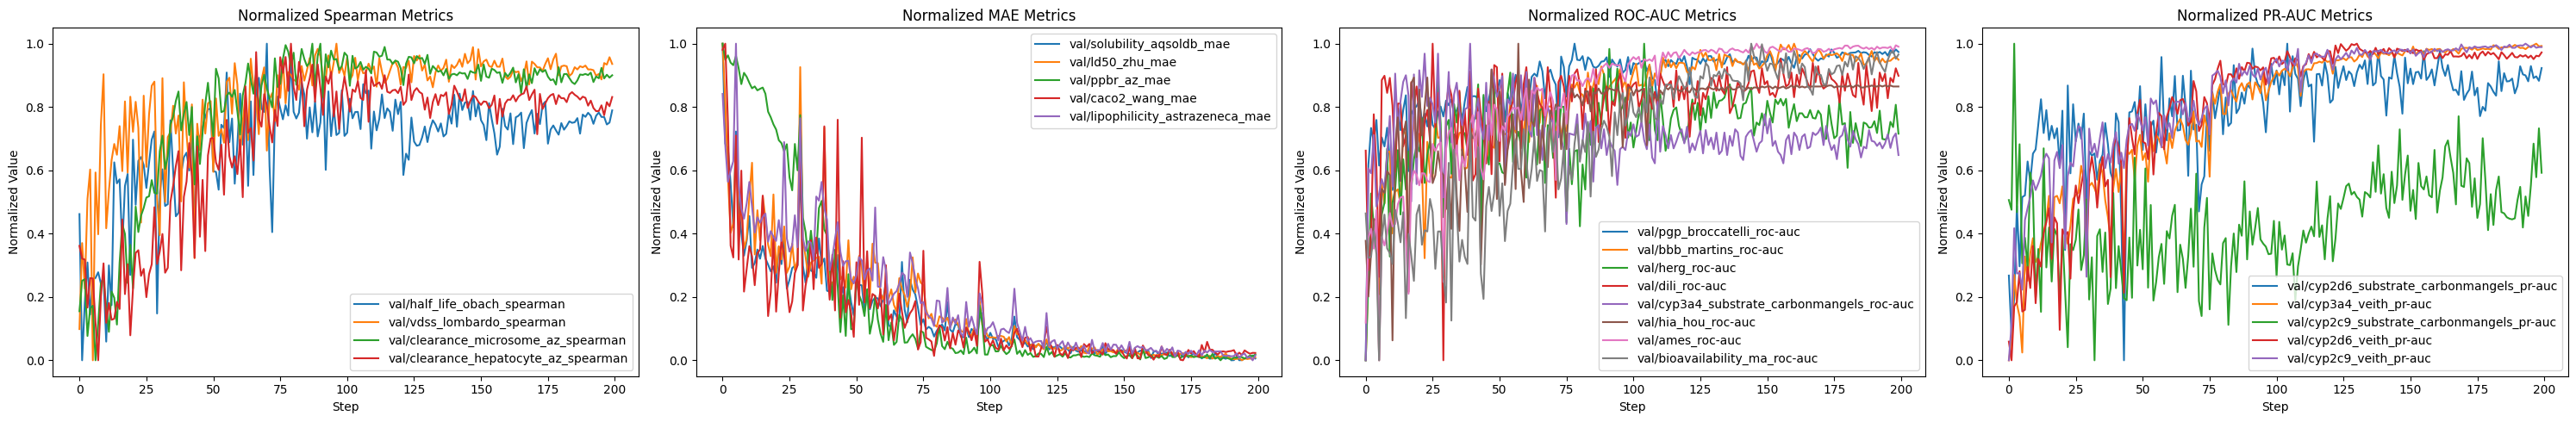

In [43]:
spearman_history_normed = minmax_normalize(spearman_history)
mae_history_normed = minmax_normalize(mae_history)
roc_auc_history_normed = minmax_normalize(roc_auc_history)
pr_auc_history_normed = minmax_normalize(pr_auc_history)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 5))

if not spearman_history_normed.empty:
    spearman_history_normed.plot(ax=ax1)
    ax1.set_title('Normalized Spearman Metrics')
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Normalized Value')
    ax1.legend(loc='best')

if not mae_history_normed.empty:
    mae_history_normed.plot(ax=ax2)
    ax2.set_title('Normalized MAE Metrics')
    ax2.set_xlabel('Step') 
    ax2.set_ylabel('Normalized Value')
    ax2.legend(loc='best')

if not roc_auc_history_normed.empty:
    roc_auc_history_normed.plot(ax=ax3)
    ax3.set_title('Normalized ROC-AUC Metrics')
    ax3.set_xlabel('Step')
    ax3.set_ylabel('Normalized Value')
    ax3.legend(loc='best')

if not pr_auc_history_normed.empty:
    pr_auc_history_normed.plot(ax=ax4)
    ax4.set_title('Normalized PR-AUC Metrics')
    ax4.set_xlabel('Step')
    ax4.set_ylabel('Normalized Value')
    ax4.legend(loc='best')

plt.tight_layout()
plt.show()


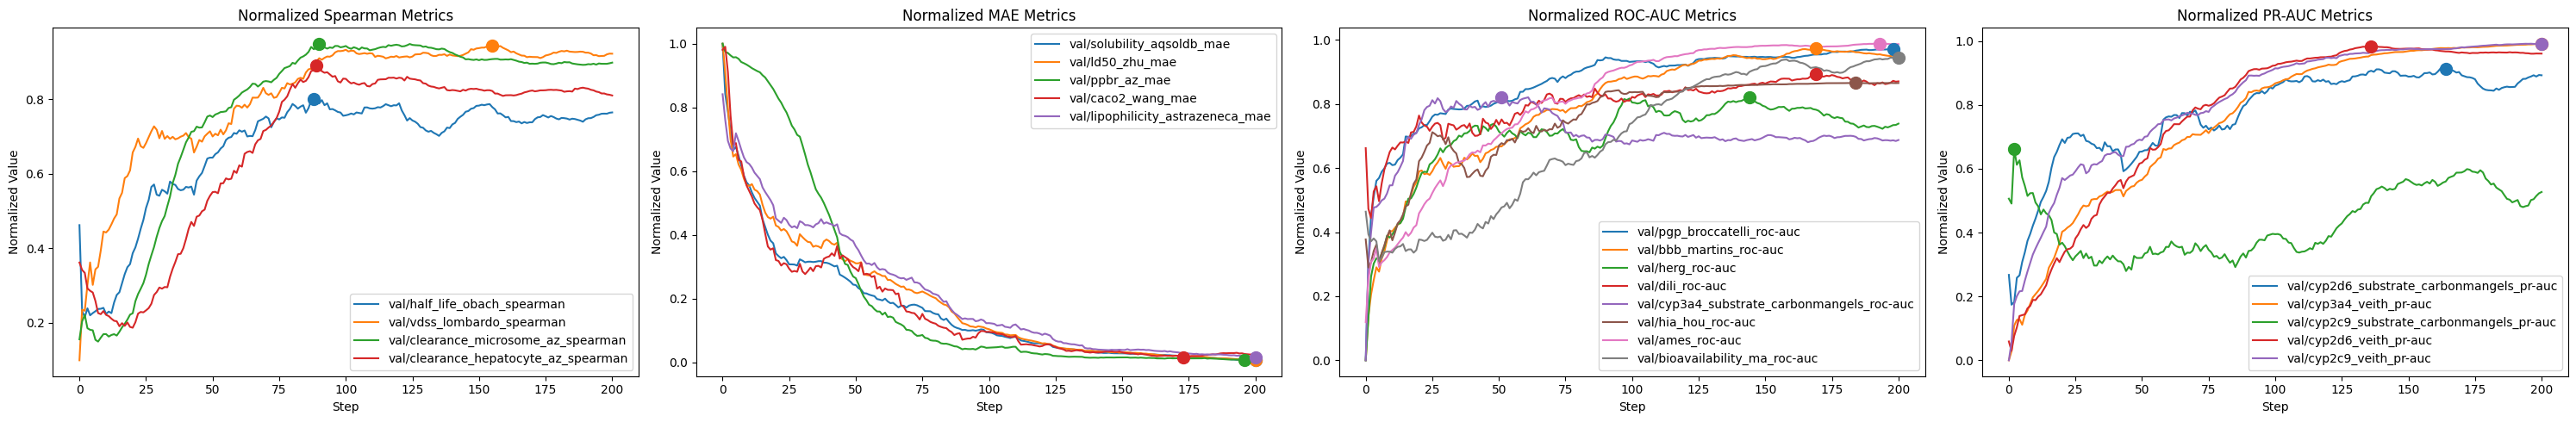

In [48]:
smoothing_factor = 15  
spearman_history_normed = minmax_normalize(spearman_history)
mae_history_normed = minmax_normalize(mae_history)
roc_auc_history_normed = minmax_normalize(roc_auc_history)
pr_auc_history_normed = minmax_normalize(pr_auc_history)

spearman_history_normed = moving_average(spearman_history_normed, smoothing_factor)
mae_history_normed = moving_average(mae_history_normed, smoothing_factor)
roc_auc_history_normed = moving_average(roc_auc_history_normed, smoothing_factor)
pr_auc_history_normed = moving_average(pr_auc_history_normed, smoothing_factor)

fig, axes = plt.subplots(1, 4, figsize=(30, 5))
ax1, ax2, ax3, ax4 = axes.flatten() #

spearman_history_normed.plot(ax=ax1)
for i, col in enumerate(spearman_history_normed.columns):
    if not spearman_history_normed[col].isnull().all(): # Check if column is not all NaN after smoothing
        max_idx = spearman_history_normed[col].idxmax()
        max_val = spearman_history_normed[col].max()
        if i < len(ax1.get_lines()): # Ensure index is within bounds
                line_color = ax1.get_lines()[i].get_color()
                ax1.scatter(max_idx, max_val, color=line_color, s=100, zorder=5) # Add zorder=5
ax1.set_title('Normalized Spearman Metrics')
ax1.set_xlabel('Step')
ax1.set_ylabel('Normalized Value')
ax1.legend(loc='best')

mae_history_normed.plot(ax=ax2)
for i, col in enumerate(mae_history_normed.columns):
    if not mae_history_normed[col].isnull().all(): # Check if column is not all NaN after smoothing
        min_idx = mae_history_normed[col].idxmin() # MAE: Use idxmin
        min_val = mae_history_normed[col].min()   # MAE: Use min
        if i < len(ax2.get_lines()): # Ensure index is within bounds
            line_color = ax2.get_lines()[i].get_color()
            ax2.scatter(min_idx, min_val, color=line_color, s=100, zorder=5) # Add zorder=5
ax2.set_title('Normalized MAE Metrics')
ax2.set_xlabel('Step')
ax2.set_ylabel('Normalized Value')
ax2.legend(loc='best')

roc_auc_history_normed.plot(ax=ax3)
for i, col in enumerate(roc_auc_history_normed.columns):
    if not roc_auc_history_normed[col].isnull().all(): # Check if column is not all NaN after smoothing
        max_idx = roc_auc_history_normed[col].idxmax()
        max_val = roc_auc_history_normed[col].max()
        if i < len(ax3.get_lines()): # Ensure index is within bounds
            line_color = ax3.get_lines()[i].get_color()
            ax3.scatter(max_idx, max_val, color=line_color, s=100, zorder=5) # Add zorder=5
ax3.set_title('Normalized ROC-AUC Metrics')
ax3.set_xlabel('Step')
ax3.set_ylabel('Normalized Value')
ax3.legend(loc='best')


pr_auc_history_normed.plot(ax=ax4)
for i, col in enumerate(pr_auc_history_normed.columns):
    if not pr_auc_history_normed[col].isnull().all(): # Check if column is not all NaN after smoothing
        max_idx = pr_auc_history_normed[col].idxmax()
        max_val = pr_auc_history_normed[col].max()
        if i < len(ax4.get_lines()): # Ensure index is within bounds
            line_color = ax4.get_lines()[i].get_color()
            ax4.scatter(max_idx, max_val, color=line_color, s=100, zorder=5) # Add zorder=5
ax4.set_title('Normalized PR-AUC Metrics')
ax4.set_xlabel('Step')
ax4.set_ylabel('Normalized Value')
ax4.legend(loc='best')

fig.tight_layout()
plt.show()


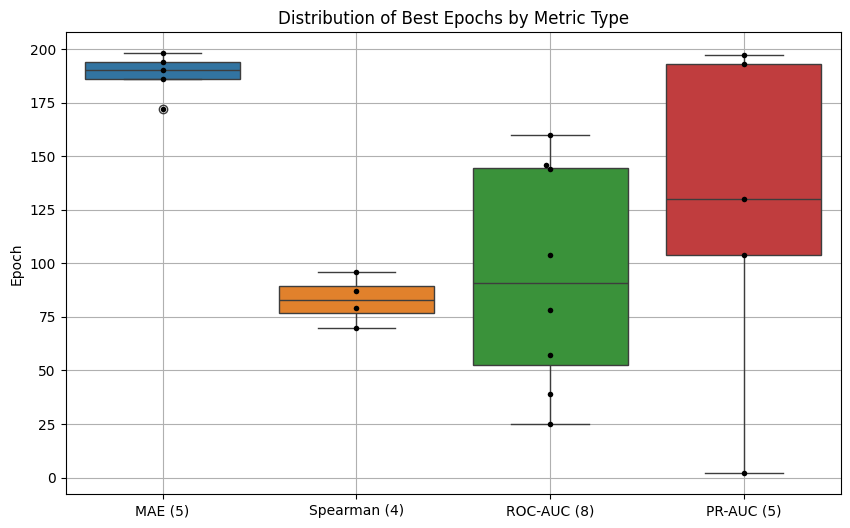

In [24]:
best_epochs = pd.DataFrame({
    f'MAE ({len(mae_history.columns)})': mae_history.apply(lambda x: x.argmin()),
    f'Spearman ({len(spearman_history.columns)})': spearman_history.apply(lambda x: x.argmax()),
    f'ROC-AUC ({len(roc_auc_history.columns)})': roc_auc_history.apply(lambda x: x.argmax()),
    f'PR-AUC ({len(pr_auc_history.columns)})': pr_auc_history.apply(lambda x: x.argmax())
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=best_epochs)
sns.swarmplot(data=best_epochs, color='black', size=4)
plt.title('Distribution of Best Epochs by Metric Type')
plt.ylabel('Epoch')
plt.grid(True)
plt.show()


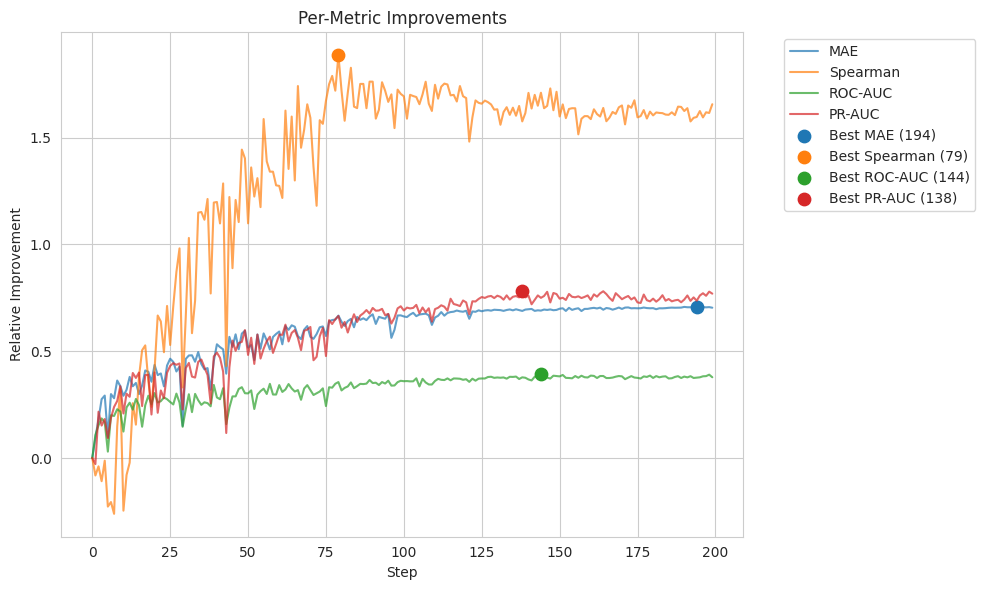

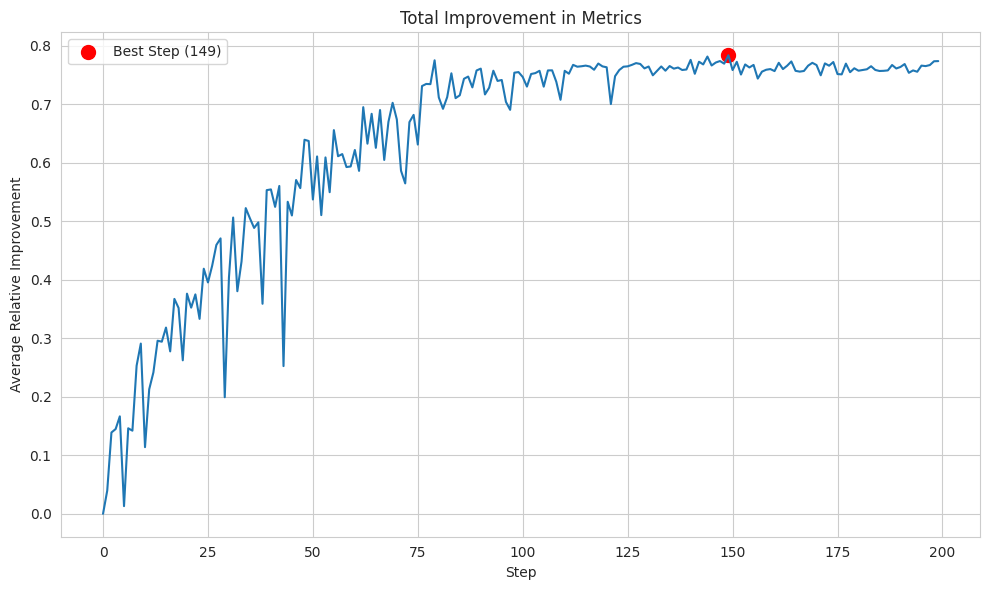


Final total improvement: nan
Best improvement 0.783 at step 149


In [84]:
base_mae = mae_history.iloc[0].to_numpy()
base_spearman = spearman_history.iloc[0].to_numpy()
base_roc = roc_auc_history.iloc[0].to_numpy()
base_pr = pr_auc_history.iloc[0].to_numpy()

mae_improvements = pd.DataFrame((base_mae - mae_history) / base_mae, 
                              index=mae_history.index,
                              columns=mae_history.columns)
spearman_improvements = pd.DataFrame(-1 * (base_spearman - spearman_history) / base_spearman,
                                   index=spearman_history.index, 
                                   columns=spearman_history.columns)
roc_auc_improvements = pd.DataFrame(-1 * (base_roc - roc_auc_history) / base_roc,
                                  index=roc_auc_history.index,
                                  columns=roc_auc_history.columns) 
pr_auc_improvements = pd.DataFrame(-1 * (base_pr - pr_auc_history) / base_pr,
                                 index=pr_auc_history.index,
                                 columns=pr_auc_history.columns)

improvements = pd.concat([
    mae_improvements.mean(axis=1).rename('MAE'),
    spearman_improvements.mean(axis=1).rename('Spearman'),
    roc_auc_improvements.mean(axis=1).rename('ROC-AUC'), 
    pr_auc_improvements.mean(axis=1).rename('PR-AUC')
], axis=1)

total_improvement = pd.concat([
    mae_improvements,
    spearman_improvements,
    roc_auc_improvements, 
    pr_auc_improvements
], axis=1).mean(axis=1)

plt.figure(figsize=(10, 6))
improvements_melted = improvements.reset_index().melt('index', var_name='Metric', value_name='Improvement')
g = sns.lineplot(data=improvements_melted, x='index', y='Improvement', hue='Metric', alpha=0.7)

for metric in improvements.columns:
    best_step = improvements[metric].idxmax()
    best_value = improvements[metric][best_step]
    line_color = g.get_lines()[list(improvements.columns).index(metric)].get_color()
    plt.scatter(best_step, best_value, color=line_color, s=80, label=f'Best {metric} ({best_step})')

plt.title('Per-Metric Improvements')
plt.xlabel('Step')
plt.ylabel('Relative Improvement')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
df = pd.DataFrame({'Step': total_improvement.index, 'Improvement': total_improvement.values})
sns.lineplot(data=df, x='Step', y='Improvement')
best_step = total_improvement.idxmax()
best_value = total_improvement[best_step]
plt.scatter(best_step, best_value, color='red', s=100, label=f'Best Step ({best_step})')

plt.title('Total Improvement in Metrics')
plt.xlabel('Step')
plt.ylabel('Average Relative Improvement')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("\nFinal total improvement:", total_improvement.iloc[-1].round(3))
print(f"Best improvement {best_value:.3f} at step {best_step}")

Max step: 198 (epoch 198), Max value: 0.12182818581101204


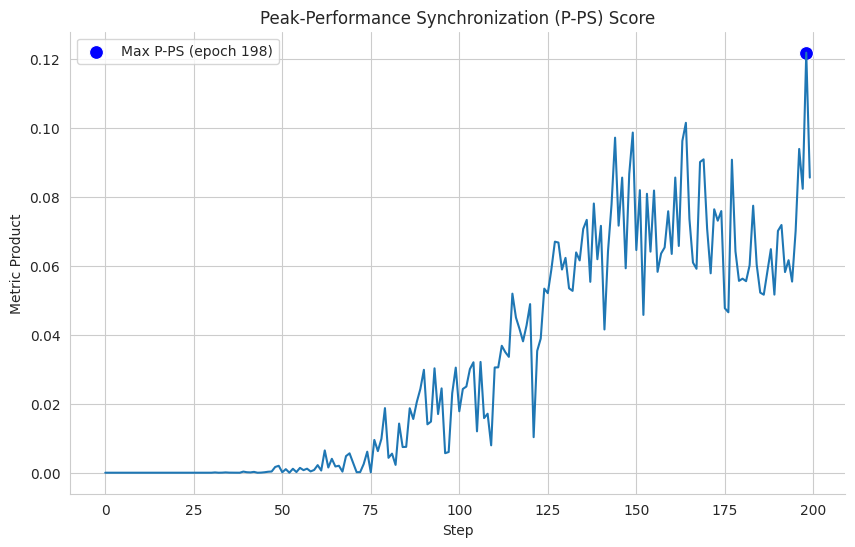

In [83]:
spearman_history_normed = minmax_normalize(spearman_history)
mae_history_normed      = 1 - minmax_normalize(mae_history)
roc_auc_history_normed  = minmax_normalize(roc_auc_history)
pr_auc_history_normed   = minmax_normalize(pr_auc_history)

all_metrics = np.concatenate([mae_history_normed.values[:-1],
                              spearman_history_normed.values[:-1],
                              roc_auc_history_normed.values[:-1],
                              pr_auc_history_normed.values[:-1]], axis=1)

pps = np.prod(all_metrics, axis=1)

max_step = np.argmax(pps)
max_value = pps[max_step]

print(f"Max step: {max_step} (epoch {max_step}), Max value: {max_value}")

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
df = pd.DataFrame({'Step': range(len(pps)), 'P-PS Score': pps})
sns.lineplot(data=df, x='Step', y='P-PS Score')
sns.scatterplot(x=[max_step], y=[max_value], color='blue', s=100, label=f'Max P-PS (epoch {max_step})')

sns.despine()
plt.title('Peak-Performance Synchronization (P-PS) Score')
plt.xlabel('Step')
plt.ylabel('Metric Product')
plt.legend()
plt.show()